In [3]:
import pandas as pd

df= pd.read_csv("data.csv")
df= df.sample(n=5000, random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


In [9]:
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "valence", "danceability", "energy", "tempo", "acousticness", "liveness", "speechiness","key", "instrumentalness"]

scaler= StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns= numerical_features)

df_scaled

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,key,instrumentalness
0,1.473178,2.032267,0.142150,0.310507,-0.005840,-0.783298,-0.107375,-0.357811,1.916073
1,0.226049,0.276101,-0.771789,-0.886487,1.126217,-0.446557,-0.133457,1.651073,-0.171477
2,0.470135,1.941333,0.138480,-0.865614,-0.908852,-0.194001,1.737477,0.503139,-0.536877
3,-1.249911,-0.417272,-0.716732,2.266056,1.144646,-0.536354,-0.387900,-1.505745,2.122604
4,-0.387981,0.634154,-1.404939,-1.477663,1.297342,-0.536354,0.010283,1.651073,2.151200
...,...,...,...,...,...,...,...,...,...
4995,0.336651,-0.019435,0.810170,0.374302,-0.837769,-0.598090,-0.353124,-0.931778,-0.536877
4996,1.507503,1.009258,1.357065,-0.824128,-1.106567,0.434583,-0.270821,0.790123,-0.536877
4997,-0.681647,-1.826752,-0.599278,-2.003804,0.999848,0.114678,-0.387900,-1.505745,-0.536835
4998,-0.906665,-0.815109,-1.495966,-0.516212,1.284178,-0.592478,-0.412243,1.364090,-0.287769


In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state= 42)

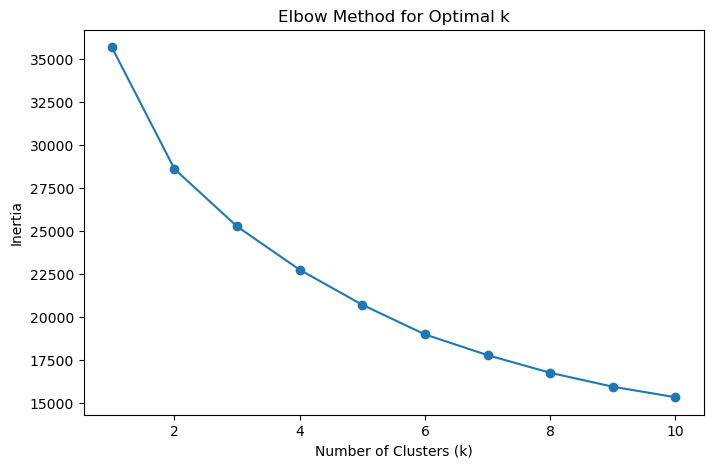

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming train_data is already defined and preprocessed
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [23]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Display cluster counts
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,0.910,1977,0.5000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,2
1,0.583,1976,0.9300,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,1
2,0.647,1994,0.1570,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,2
3,0.196,1957,0.9370,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,0
4,0.422,1921,0.9950,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761,3
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016,2
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846,1
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457,1


In [24]:
df['Cluster'].value_counts()

Cluster
2    1586
1    1283
3    1184
0     739
4     208
Name: count, dtype: int64

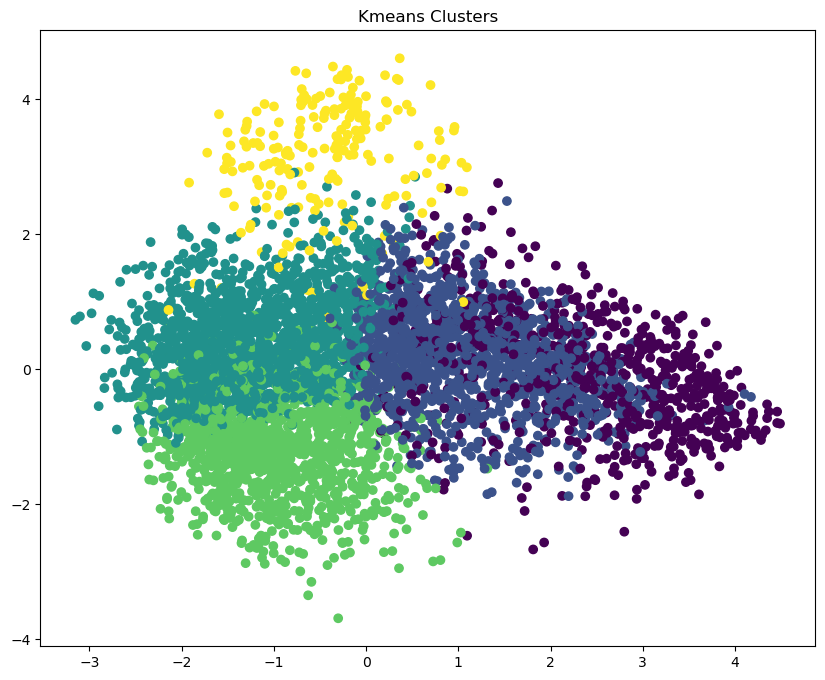

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result= pca.fit_transform(df_scaled)


plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap='viridis')
plt.title("Kmeans Clusters")
plt.show()

In [36]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Ensure the song exists in the dataset
    if song_name not in df["name"].values:
        print(f"'{song_name}' not found in dataset.")
        return []

    # Get the cluster of the input song
    song_cluster = df[df['name'] == song_name]['Cluster'].values[0]

    # Get all songs in the same cluster
    same_cluster_songs = df[df['Cluster'] == song_cluster]

    # Find the index of the input song
    song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]
    
    # Select only numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Extract numerical features for clustering
    cluster_features = same_cluster_songs[numerical_features]
    
    # Compute cosine similarity (only with numeric data)
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get the index position within the cluster
    song_idx_within_cluster = same_cluster_songs.index.get_loc(song_index)

    # Get most similar songs (excluding the input song itself)
    similar_songs = np.argsort(similarity[song_idx_within_cluster])[-(num_recommendations + 1):-1][::-1]

    # Retrieve recommended songs
    recommendations = same_cluster_songs.iloc[similar_songs][['name', 'year', 'artists']]

    return recommendations

# Example usage:
input_song = "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
print(recommended_songs)


Songs similar to 'Camby Bolongo':
                                name  year                           artists
3312                        Get Gone  1999                         ['Ideal']
2617                     Do It Again  1984  ['オメガトライブ', 'Kiyotaka Sugiyama']
346              What's Your Fantasy  2000                      ['Ludacris']
36    Ball And Chain - 2001 Remaster  1982                           ['XTC']
3520                       Long Time  2011                          ['Cake']


In [40]:
df.to_csv("clustered_df.csv")